In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from os import listdir
from sklearn.preprocessing import StandardScaler
import umap
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from matplotlib_venn import venn2, venn3
from scipy import stats

In [2]:
# taxfiles = listdir('../../MOTUS_TAX/')
# tax_values = []; samples = [];
# for f in taxfiles:
#     temp = pd.read_csv('../../MOTUS_TAX/'+f,skiprows=2,sep='\t')
#     tax_values.append(list(temp['unnamed sample']))
#     samples.append(f.split('_')[0])
# temp = pd.read_csv('../../MOTUS_TAX/A10_tax.txt',skiprows=2,sep='\t')
# taxnames = [ x for x in list(temp['#consensus_taxonomy'])]


# oral_tax = pd.DataFrame(zip(taxnames),columns=['Species'])
# for i in range(len(samples)):
#     oral_tax[samples[i]]=tax_values[i]
    
# oral_tax = oral_tax.set_index(['Species'])
# oral_tax = oral_tax.loc[(oral_tax !=0).any(axis=1)]
# oral_tax.to_csv('../data/metagenome/motus_profile.csv')

# Differential analysis for species-level microbial abundance

In [10]:
# from pydeseq2.dds import DeseqDataSet
# from pydeseq2.default_inference import DefaultInference
# from pydeseq2.ds import DeseqStats

In [9]:
# oral_tax = pd.read_csv('../data/metagenome/motus_profile.csv')
# spnames = [ x.split('[ref')[0].split('[meta')[0].split('[ext')[0].\
#            replace('[','').replace(']','').strip() for x in list(oral_tax['Species'])]
# oral_tax['Species'] = spnames
# oral_tax = oral_tax.rename(columns={'Species':'Sample'})

# meta = pd.DataFrame(zip(list(oral_tax.columns)[1:], 
#                     ['A' for i in range(10)] + ['B' for i in range(10)] ), columns=['Sample','Group'])
# meta = meta.set_index('Sample')
# oral_tax = oral_tax.set_index(['Sample'])
# for k in oral_tax.columns:
#     temp = [ int(x*1e5) for x in list(oral_tax[k]) ]
#     oral_tax[k] = temp
# oral_tax = oral_tax.T
# oral_quant = oral_tax.groupby(oral_tax.columns, axis=1).sum()

# inference = DefaultInference()
# dds = DeseqDataSet( counts= oral_quant, metadata= meta,
#     design_factors="Group", refit_cooks=True,ref_level= ["Group", "A"], inference=inference )

In [8]:
# dds.deseq2()
# print(dds)

In [7]:
# diffanalysis = DeseqStats(dds,contrast= ['Group', 'B', 'A'], inference=inference)
# diffanalysis.summary()

In [6]:
# diffanalysis.results_df.to_csv("../data/metagenome/sps_deg.csv")

In [2]:
def volcano( table, lfc_col, pv_col, lfc_cutoff, pv_cutoff, size, ax):
    lfc_list = list(table[lfc_col])
    mlg10pv = [ -np.log10(x) for x in list(table[pv_col]) ]
    x_cut1 = lfc_cutoff; x_cut2 = - lfc_cutoff;
    y_cut = -np.log10( pv_cutoff )
    color_list = []
    for i in range(len(lfc_list) ):
        if mlg10pv[i] > y_cut:
            if lfc_list[i] > x_cut1:
                color_list.append('red')
            elif lfc_list[i] < x_cut2:
                color_list.append('blue')
            else:
                color_list.append('grey')
        else:
            color_list.append('grey')
    ax.scatter(lfc_list, mlg10pv, c=color_list, marker='o',linewidth=0.5,edgecolor='black',s=size, alpha=0.5)
    ax.axhline(y=y_cut, color='grey', linestyle='--')
    ax.axvline(x=x_cut1, color='grey', linestyle='--')
    ax.axvline(x=x_cut2, color='grey', linestyle='--')
    return ax

def annot_volcano( table, name_col, lfc_col, pv_col, lfc_cutoff, pv_cutoff, fontsize, ax ):
    x_cut1 = lfc_cutoff; x_cut2 = - lfc_cutoff;
    y_cut = -np.log10( pv_cutoff )
    
    sig_table = table[ ( (table[lfc_col]>x_cut1) | (table[lfc_col]<x_cut2) ) & (table[pv_col]<pv_cutoff)  ]
    sig_table = sig_table.reset_index().drop(['index'],axis=1)
    x_list = list(sig_table[lfc_col])
    y_list = [ -np.log10(x) for x in list(sig_table[pv_col]) ]
    names = list(sig_table[name_col])
    
    for i in range(len(x_list)):
        if x_list[i] >0:
            ax.text(0.9*x_list[i], y_list[i]*0.99, s=names[i], fontsize=fontsize)
        else:
            ax.text(1.01*x_list[i], y_list[i]*0.99, s=names[i], fontsize=fontsize)   
    return ax

In [3]:
spdeg = pd.read_csv('../data/metagenome/sps_deg.csv')
spdeg= spdeg.rename(columns={'Sample':'Species'})
spdeg = spdeg.dropna()

In [4]:
lfc_col='log2FoldChange'; x_cut1=1.0;x_cut2=-1.0;pv_col='padj';pv_cutoff=0.01;
table = spdeg
sig_table = table[ ( (table[lfc_col]>x_cut1) | (table[lfc_col]<x_cut2) ) & (table[pv_col]<pv_cutoff)  ]
sig_table = sig_table.sort_values(['log2FoldChange'],ascending=False)
sig_table = sig_table.reset_index().drop(['index'],axis=1)

In [7]:
sig_table

,Species,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,Streptococcus sobrinus,115.078399,9.419773,2.053158,4.587944,4.476334e-06,0.000308
1,Bifidobacterium dentium,45.488951,8.960763,1.838896,4.872904,1.099694e-06,0.000189
2,Mitsuokella sp. oral taxon 131,23.597011,8.013748,1.870836,4.283510,1.839674e-05,0.000904
3,Lactobacillus salivarius,46.152367,7.792713,1.903182,4.094571,4.229499e-05,0.001819
4,Streptococcus mutans,41.614916,7.642189,1.880744,4.063386,4.836600e-05,0.001849
5,Propionibacterium acidifaciens,38.952633,7.549415,1.641967,4.597787,4.270019e-06,0.000308
6,Cryptobacterium curtum,21.112797,6.972689,1.928964,3.614732,3.006590e-04,0.007388
7,Prevotella multisaccharivorax,20.283013,6.914641,1.879446,3.679084,2.340730e-04,0.006710
8,Prevotella salivae,566.631784,3.835513,0.994638,3.856191,1.151675e-04,0.003962
9,Haemophilus sp.,318.845327,-4.273140,1.177418,-3.629245,2.842514e-04,0.007388


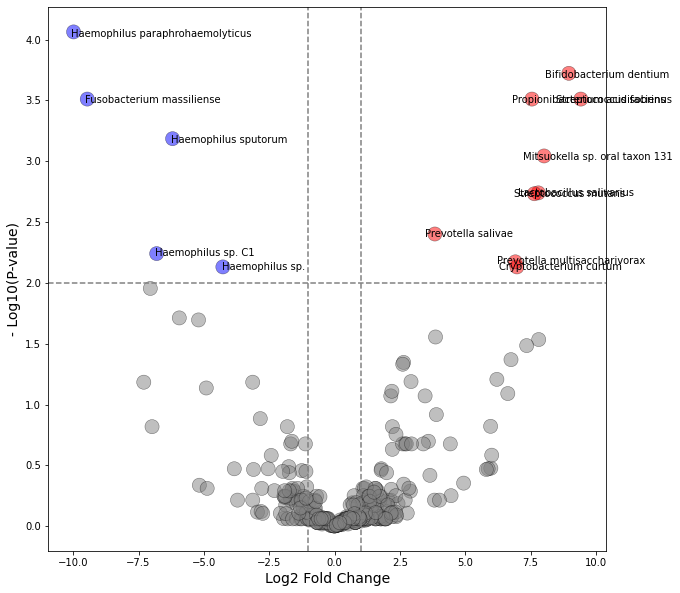

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
volcano( spdeg, 'log2FoldChange', 'padj', 1.0, 0.01, 200, ax=ax)
ax.set_xlabel('Log2 Fold Change',fontsize=14)
ax.set_ylabel('- Log10(P-value)',fontsize=14)
annot_volcano( spdeg,'Species' ,'log2FoldChange', 'padj', 1.0, 0.01, 10, ax=ax );
# plt.savefig('../../../../Oral_paper/Figures_2025/daa_species.svg',format='svg',dpi=150)

# UMAP

In [10]:
oral_tax = pd.read_csv('../data/metagenome/motus_profile.csv')
spnames = [ x.split('[ref')[0].split('[meta')[0].split('[ext')[0].\
           replace('[','').replace(']','').strip() for x in list(oral_tax['Species'])]
oral_tax['Species'] = spnames; oral_tax = oral_tax.rename(columns={'Species':'Sample'})
oral_tax = oral_tax.set_index(['Sample'])
oral_tax = oral_tax.T; oral_quant = oral_tax.groupby(oral_tax.columns, axis=1).sum();
threshold = pd.read_csv('../data/metagenome/Thresholds.csv')
sample_info = pd.read_csv('../data/sample_info.csv')
oral_quant.head()

Sample,Abiotrophia defectiva,Acidaminococcus species incertae sedis,Acidovorax wautersii,Acinetobacter baumannii,Actinobacteria sp.,Actinobaculum sp. oral taxon 183,Actinomyces bouchesdurhonensis,Actinomyces dentalis,Actinomyces gerencseriae,Actinomyces graevenitzii,...,Veillonella denticariosi,Veillonella dispar,Veillonella parvula,Veillonella rogosae,Veillonella sp.,Veillonella species incertae sedis,Veillonella tobetsuensis,Weissella confusa,Weissella paramesenteroides,unassigned
A10,0.000198,0.0,0.0,0.000000,0.003645,0.000081,0.000000,0.000277,0.000086,0.005495,...,0.0,0.002468,0.001105,0.041786,0.001101,0.003468,0.004988,0.0,0.0,0.071457
A11,0.000440,0.0,0.0,0.000000,0.008368,0.000030,0.016645,0.000115,0.000046,0.016826,...,0.0,0.015411,0.003669,0.000787,0.000278,0.039186,0.000157,0.0,0.0,0.034749
A1,0.010644,0.0,0.0,0.000000,0.003527,0.000910,0.000000,0.000773,0.000822,0.001720,...,0.0,0.001753,0.003181,0.011843,0.013361,0.006406,0.002494,0.0,0.0,0.043114
A20,0.000000,0.0,0.0,0.000672,0.008431,0.001276,0.000000,0.001029,0.001319,0.004478,...,0.0,0.004752,0.022527,0.007487,0.002804,0.016425,0.000000,0.0,0.0,0.035508
A28,0.003256,0.0,0.0,0.000000,0.001518,0.000587,0.000000,0.000649,0.000553,0.000000,...,0.0,0.000752,0.003571,0.018238,0.001710,0.003183,0.001323,0.0,0.0,0.042862


In [4]:
X = oral_quant.iloc[:,:].values
X = StandardScaler().fit_transform(X)
reducer_sp = umap.UMAP(random_state=0)
embedding = reducer_sp.fit_transform(X)
umap_pd = pd.DataFrame(embedding, columns =['UMAP-1','UMAP-2'])
umap_pd['Group'] = ['A (20~30yo)' for i in range(10)] + ['B (55~80yo)' for i in range(10)]

/home/bras5181/miniconda3/lib/python3.8/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


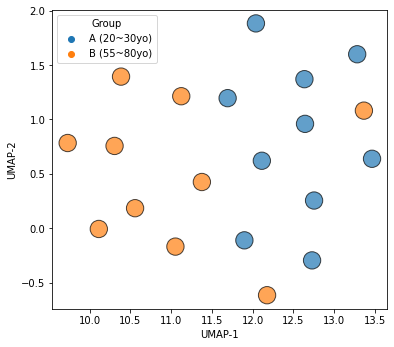

In [5]:
fig, ax = plt.subplots(1,1,figsize=(6,5.5))
sns.scatterplot(x='UMAP-1', y='UMAP-2',hue="Group",
            linewidth=1,data=umap_pd, s=300, alpha=0.7, edgecolor='black', ax=ax)
ax.set_xlabel('UMAP-1'); ax.set_ylabel('UMAP-2');
# plt.savefig('../../../../Oral_paper/Figures_2025/umap_species.svg',format='svg',dpi=150)

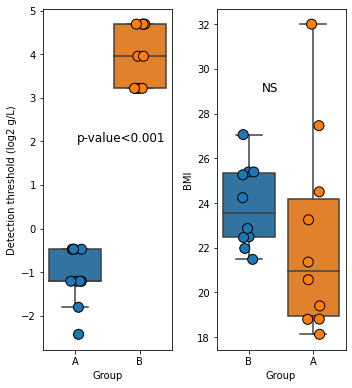

In [31]:
fig, axs = plt.subplots(1,2,figsize=(5,5.5))
temp_pd = pd.DataFrame(zip(['A' for i in range(10)] + ['B' for i in range(10)],
                          np.log2(threshold['Detection threshold']) ),columns=['Group','Detection threshold'])
sns.boxplot(data=temp_pd,x='Group',y='Detection threshold',ax=axs[0])
sns.stripplot(data=temp_pd,x='Group',y='Detection threshold',size=10,edgecolor='black',linewidth=1,ax=axs[0])
axs[0].set_ylabel('Detection threshold (log2 g/L)')
sample_info['Group']=['B' for i in range(10)]+['A' for i in range(10)]
sns.boxplot(data=sample_info,x='Group',y='BMI',ax=axs[1])
sns.stripplot(data=sample_info,x='Group',y='BMI',size=10,edgecolor='black',linewidth=1,ax=axs[1])
fig.tight_layout()
axs[0].text(0.02,2,s='p-value<0.001',fontsize=12)
axs[1].text(0.2,29,s='NS',fontsize=12)
# plt.savefig('../../../../Oral_paper/Figures_2025/taste_threshold.svg',format='svg',dpi=150)

In [8]:
genus_quant = oral_quant.copy()
for col in genus_quant.columns:
    genus_quant=genus_quant.rename(columns={col:col.split(' ')[0]})
genus_quant = genus_quant.groupby(genus_quant.columns, axis=1).sum();

In [9]:
A_quant = oral_quant.iloc[:10].drop(['unassigned'],axis=1); B_quant=oral_quant.iloc[10:].drop(['unassigned'],axis=1);
Asp_avg = pd.DataFrame( A_quant.mean(axis=0), columns=['Average']).sort_values(['Average'],ascending=False)
Bsp_avg = pd.DataFrame( B_quant.mean(axis=0), columns=['Average']).sort_values(['Average'],ascending=False)

In [10]:
Agenus_quant = genus_quant.iloc[:10].drop(['unassigned'],axis=1);
Bgenus_quant = genus_quant.iloc[10:].drop(['unassigned'],axis=1);
Ag_avg = pd.DataFrame( Agenus_quant.mean(axis=0), columns=['Average']).sort_values(['Average'],ascending=False)
Bg_avg = pd.DataFrame( Bgenus_quant.mean(axis=0), columns=['Average']).sort_values(['Average'],ascending=False)

# MAGs

In [2]:
Abin_quant = pd.read_csv('../data/metagenome/A_bin_abundance_table.tab',sep='\t');
Bbin_quant = pd.read_csv('../data/metagenome/B_bin_abundance_table.tab',sep='\t');
Abin_qc = pd.read_csv('../data/metagenome/A_metawrap_90_10_bins.stats',sep='\t');
Bbin_qc = pd.read_csv('../data/metagenome/B_metawrap_90_10_bins.stats',sep='\t');

In [3]:
# Aclass = pd.read_csv('../data/metagenome/A_gtdbtk.tsv',sep='\t');
# Bclass = pd.read_csv('../data/metagenome/B_gtdbtk.tsv',sep='\t');
# def process_class(text):
#     g = text.split(';g__')[1].split(';s__')[0].strip()
#     sp=text.split(';s__')[1]
#     if sp=='':
#         sp='unknown'
#     return {'genus':g,'species':sp}

In [4]:
# bins=list(Aclass.user_genome)
# tax=[ process_class(text) for text in Aclass.classification]
# Aclass_pd = pd.DataFrame(tax); Aclass_pd['bin_id']=bins;
# Aclass_pd.to_csv('../data/metagenome/A_species.csv',index=None);
# bins=list(Bclass.user_genome)
# tax=[ process_class(text) for text in Bclass.classification]
# Bclass_pd = pd.DataFrame(tax); Bclass_pd['bin_id']=bins;
# Bclass_pd.to_csv('../data/metagenome/B_species.csv',index=None);

In [5]:
Aclass = pd.read_csv('../data/metagenome/A_species.csv');
Bclass = pd.read_csv('../data/metagenome/B_species.csv');

In [6]:
# fig, axs = plt.subplots(1,4,figsize=(20,4))
# o1=venn2([set(list(Ag_avg.index)[:50]),set(Aclass['genus'])],set_labels=('Top 50','MAGs'),ax=axs[0])
# o2=venn2([set(list(Asp_avg.index)[:50]),set(Aclass['species'])],set_labels=('Top 50','MAGs'),ax=axs[1])
# o3=venn2([set(list(Bg_avg.index)[:50]),set(Bclass['genus'])],set_labels=('Top 50','MAGs'),ax=axs[2])
# o4=venn2([set(list(Bsp_avg.index)[:50]),set(Bclass['species'])],set_labels=('Top 50','MAGs'),ax=axs[3])
# axs[0].set_title('A group genus levels'); axs[1].set_title('A group species levels');
# axs[2].set_title('B group genus levels'); axs[3].set_title('B group species levels');

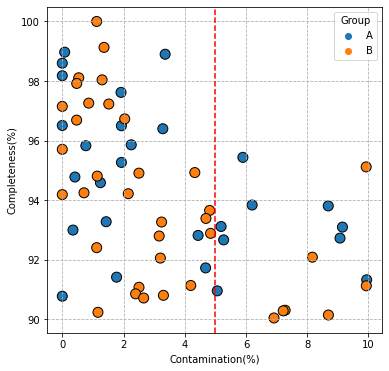

In [7]:
qc_pd = pd.DataFrame(zip(list(Abin_qc['completeness'])+list(Bbin_qc['completeness']),
                        list(Abin_qc['contamination'])+list(Bbin_qc['contamination']),
                        ['A' for i in range(len(Abin_qc.index))]+['B' for i in range(len(Bbin_qc.index))]), 
                     columns=['Completeness(%)','Contamination(%)','Group'])
fig, ax = plt.subplots(1,1,figsize=(6,6))
sns.scatterplot(data=qc_pd,x='Contamination(%)',y='Completeness(%)',hue='Group',
                edgecolor='black',linewidth=1,s=100,ax=ax)
ax.grid(ls='--')
ax.axvline(x=5,color='red',ls='--')

In [8]:
genus_colors = {'Streptococcus':'tab:orange','Prevotella':'tab:red','Alloprevotella':'tab:red',
               'Haemophilus':'tab:blue','Neisseria':'tab:purple','Porphyromonas':'tab:olive','Veillonella':'tab:brown'}

In [21]:
max(Abin_quant.iloc[:,1:].values[2])

127.685481

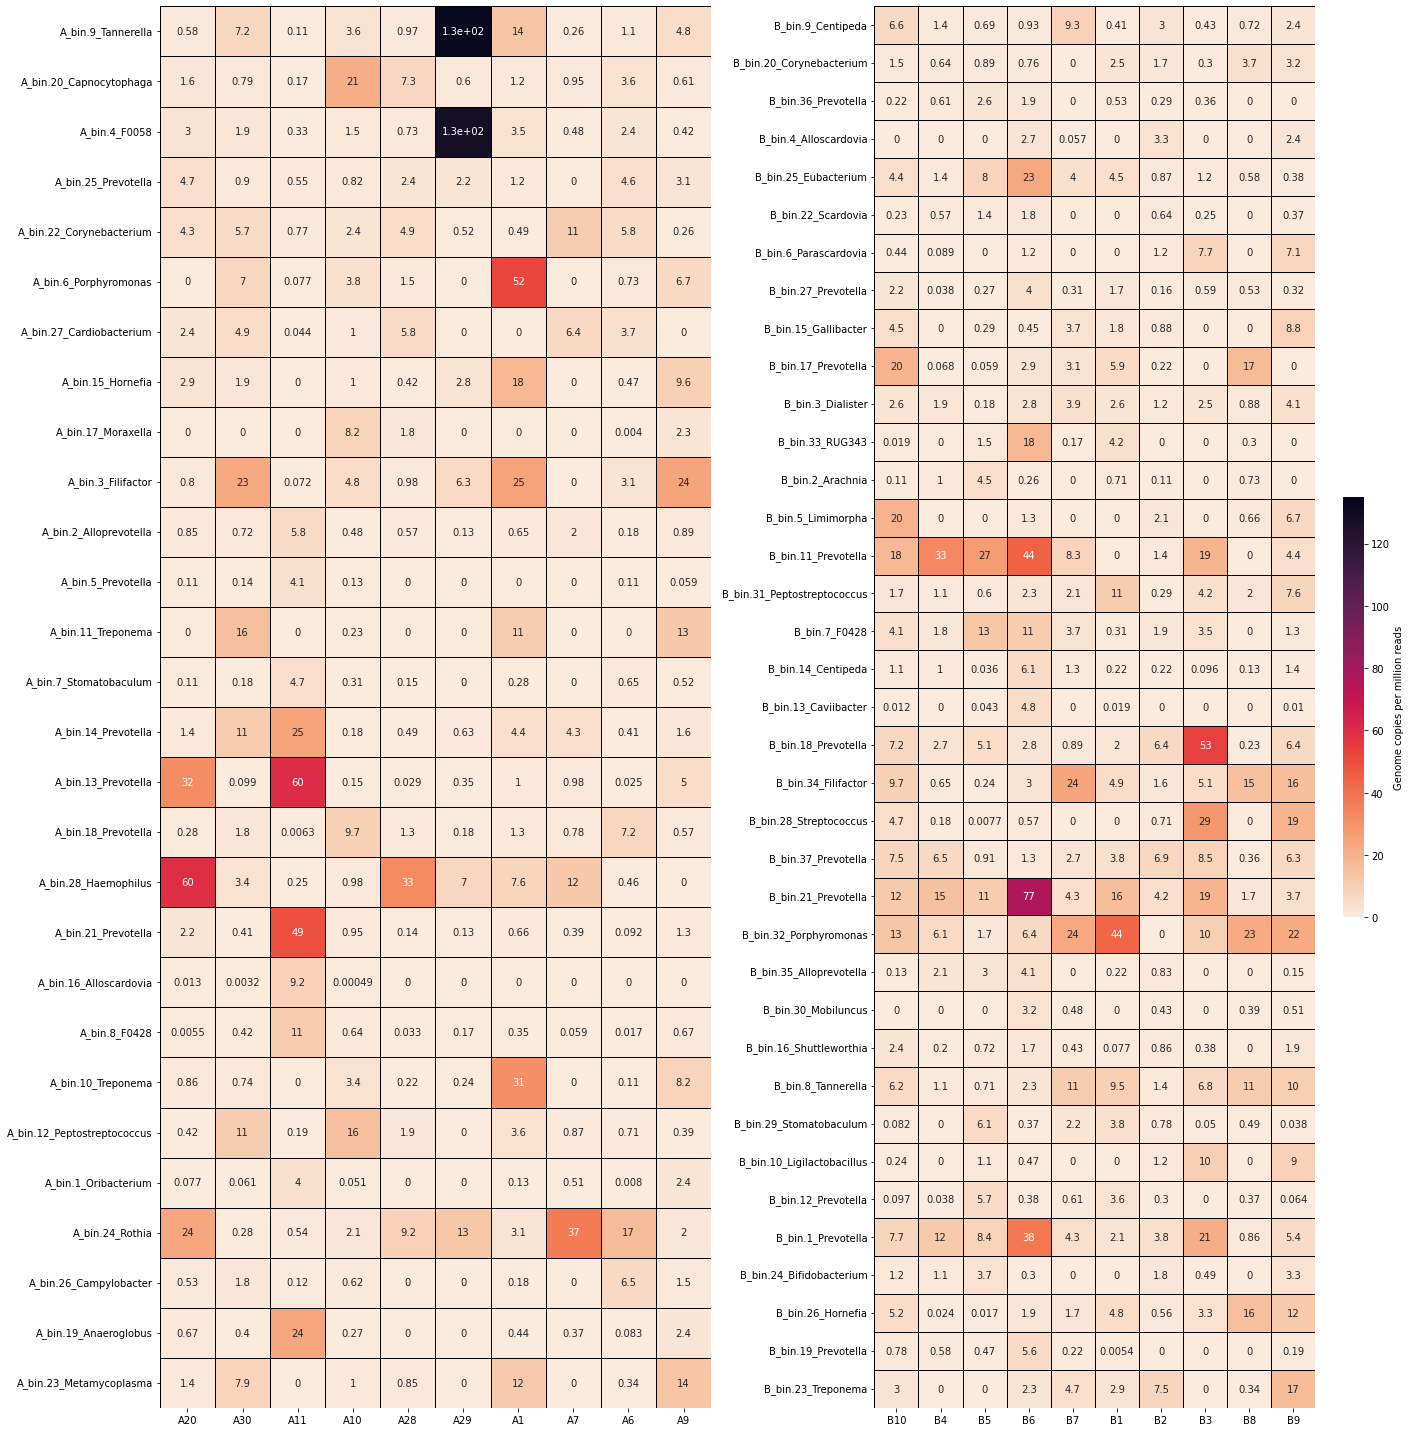

In [24]:
Aticks = [ 'A_'+x+'_'+list(Aclass[Aclass['bin_id']==x]['genus'])[0]for x in Abin_quant['Genomic bins']]
Bticks = [ 'B_'+x+'_'+list(Bclass[Bclass['bin_id']==x]['genus'])[0]for x in Bbin_quant['Genomic bins']]
fig, axs = plt.subplots(1,2,figsize=(20,20))
sns.heatmap(data=Abin_quant.iloc[:,1:], yticklabels=Aticks,cmap ="rocket_r", vmax=135.0,
            cbar=False,
            linewidths=0.8,linecolor="black",annot=True,ax=axs[0]);
sns.heatmap(data=Bbin_quant.iloc[:,1:],yticklabels=Bticks,cmap ="rocket_r", vmax=135.0,
            cbar_kws={"shrink": 0.3, 'label':'Genome copies per million reads'},
            linewidths=0.8,linecolor="black",annot=True,ax=axs[1]);
fig.tight_layout()

In [15]:
Abin_quant = pd.read_csv('../data/metagenome/A_bin_abundance_table.tab',sep='\t');
Bbin_quant = pd.read_csv('../data/metagenome/B_bin_abundance_table.tab',sep='\t');
Abin_quant =Abin_quant.set_index(['Genomic bins']); Bbin_quant =Bbin_quant.set_index(['Genomic bins']); 
Abin_avg = pd.DataFrame( Abin_quant.mean(axis=1) ,columns=['CPM'])
Bbin_avg = pd.DataFrame( Bbin_quant.mean(axis=1) ,columns=['CPM'])
Abin_avg = Abin_avg.sort_values(['CPM'],ascending=False); Bbin_avg = Bbin_avg.sort_values(['CPM'],ascending=False); 

In [57]:
Bbin_avg[Bbin_avg['CPM']<1.0]

,CPM
Genomic bins,
bin.16,0.860282
bin.4,0.847583
bin.19,0.780603
bin.2,0.748555
bin.36,0.646246
bin.22,0.525265
bin.30,0.498117
bin.13,0.492825


## QS proteins

In [3]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

In [8]:
# qs_records=[]
# for i in range(len(qsdb.index)):
#     seq = list(qsdb['AA senquence'])[i].strip()
#     ID = 'ID:'+list(qsdb['QS protein'])[i] + ' Type:' + list(qsdb['Protein type'])[i]
#     qs_records.append( SeqRecord(Seq(seq), id = ID, name="",description="") )
# SeqIO.write(qs_records, '../data/metagenome/qs_proteins.fasta' ,"fasta")

213

In [4]:
def comple_array(arr1,arr2):
    arr = arr1+arr2
    arr = arr>0
    return [int(x) for x in arr]

In [9]:
# qsdb = pd.read_csv('../data/metagenome/QSdb.csv')
# all_qs = list(np.unique( qsdb['Protein type']))
# blast_files = listdir('../data/QS_blast/')
# qs_data = []
# for f in blast_files:
#     temp = {k:0 for k in all_qs}
#     temp['bin_id'] = f.replace('.QS.txt','')
#     with open('../data/QS_blast/'+f) as file:
#         if sum(['#' not in line for line in file])==0:
#             qs_data.append(temp)
#             continue
#     temp_pd = pd.read_csv( '../data/QS_blast/'+f,comment='#', sep='\t', header=None)
#     temp_pd.columns=['query_id', 'subject_id', 'percent_identity', 'alignment_length',
#               'mismatches', 'gap_opens', 'query_start', 'query_end','subject_start', 'subject_end', 'e_value', 'bit_score']
#     matched = list( np.unique( list(temp_pd['query_id']) ) )
#     matched = [x.replace('ID:','') for x in matched]
#     found_types = np.unique( list( qsdb[qsdb['QS protein'].isin(matched)]['Protein type'] ) )
#     for k in found_types:
#          temp[k] = 1
#     qs_data.append(temp)
# qs_matched = pd.DataFrame(qs_data)
# for col in qs_matched.columns:
#     if '/' in col:
#         qs_matched[col.split('/')[0]]=list(qs_matched[col])
#         qs_matched[col.split('/')[1]]= comple_array(qs_matched[col],qs_matched[col.split('/')[1]])
#         qs_matched = qs_matched.drop([col],axis=1)

In [10]:
# qs_matched = qs_matched.rename(columns={'4-hydroxy-3-(11-methyldodecyl)-6-(2-methylpropyl)-pyranone synthases':'Pyranone synthases'})
# qs_matched = qs_matched.set_index(['bin_id'])
# qs_matched.to_csv('../data/metagenome/QS_matched.csv')

In [10]:
Aclass = pd.read_csv('../data/metagenome/A_species.csv');
Bclass = pd.read_csv('../data/metagenome/B_species.csv');
qs_matched = pd.read_csv('../data/metagenome/QS_matched.csv')
qs_matched = qs_matched.rename(columns={'bin_id':'QS proteins'})
qs_matched = qs_matched.set_index(['QS proteins'])
qs_matched = qs_matched.T
A_cols = []; B_cols = [];
for bin_id in Aclass.bin_id:
    qs_matched = qs_matched.rename(columns={'A_'+bin_id:'A_'+bin_id+'_'\
                                            +list(Aclass[Aclass['bin_id']==bin_id]['genus'])[0] })
    A_cols.append( 'A_'+bin_id+'_'+list(Aclass[Aclass['bin_id']==bin_id]['genus'])[0])
for bin_id in Bclass.bin_id:
    qs_matched = qs_matched.rename(columns={'B_'+bin_id:'B_'+bin_id\
                                            +'_'+list(Bclass[Bclass['bin_id']==bin_id]['genus'])[0] })
    B_cols.append('B_'+bin_id+'_'+list(Bclass[Bclass['bin_id']==bin_id]['genus'])[0])

A_qs = qs_matched[A_cols]; B_qs = qs_matched[B_cols];
qs_order=['AI-2 synthases','AI-2 receptor','CAI-1 synthases','CAI-1 receptor',
    'HAQs synthases','HAQs receptor','DSFs synthases','DSFs-binding receptor',
        'AHLs synthases','Dialkylresorcinols synthases','Indole synthases','Pyranone synthases']
A_qs = A_qs.reindex(qs_order); B_qs = B_qs.reindex(qs_order)

In [11]:
# TCS,LuxR-type receptor,  'Noradrenaline synthases','Noradrenaline receptor' found in all MAGs.

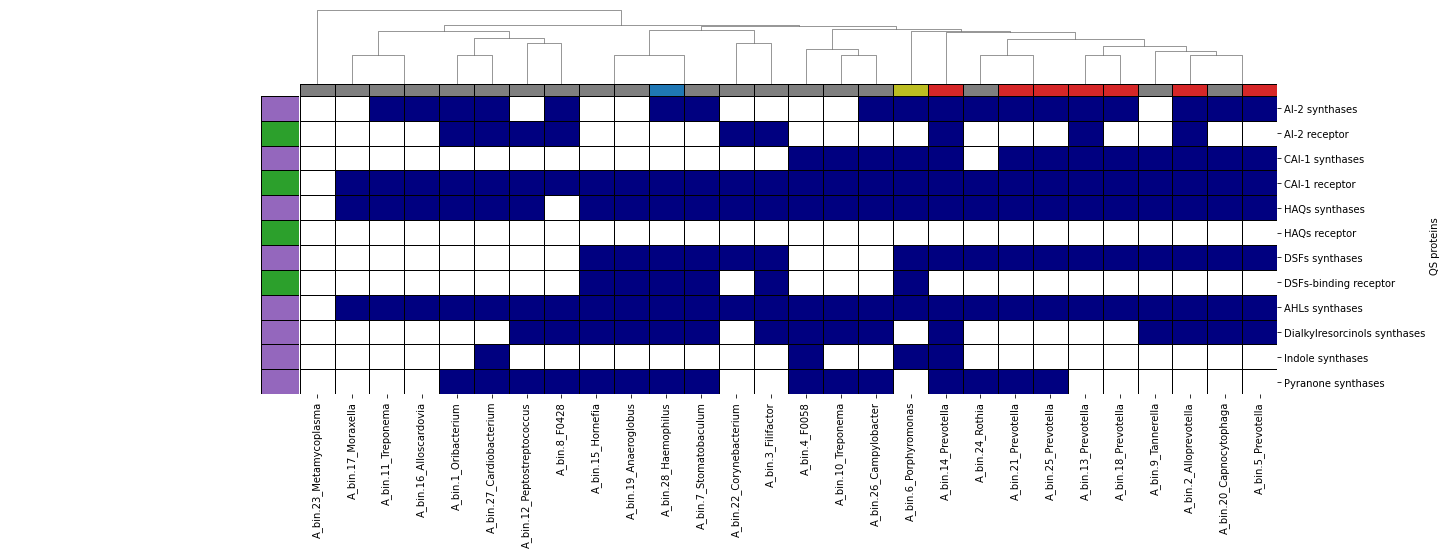

In [16]:
row_colors=[]; col_colors=[]
for qsp in A_qs.index:
    if 'recep' in qsp:
        row_colors.append('tab:green')
    else:
        row_colors.append('tab:purple')
for mag in A_qs.columns:
    if mag.split('_')[-1] not in genus_colors.keys():
        col_colors.append('tab:gray')
    else:
        col_colors.append(genus_colors[mag.split('_')[-1]])
        
fg=sns.clustermap(A_qs, row_cluster=False,figsize=(20,8),cmap =['white', 'navy'],cbar_kws={'ticks':[0,1.0]},
               row_colors=row_colors,col_colors=col_colors,linecolor='black',linewidths=1, cbar_pos=None)
fg.ax_heatmap.set_ylabel('QS proteins')
fg.ax_heatmap.set_xlabel('')
# fg.ax_heatmap.set_title('A Group',y=1.2,fontsize=16)
# plt.savefig('../../../../Oral_paper/Figures_2025/A_QS.svg',format='svg',dpi=150)

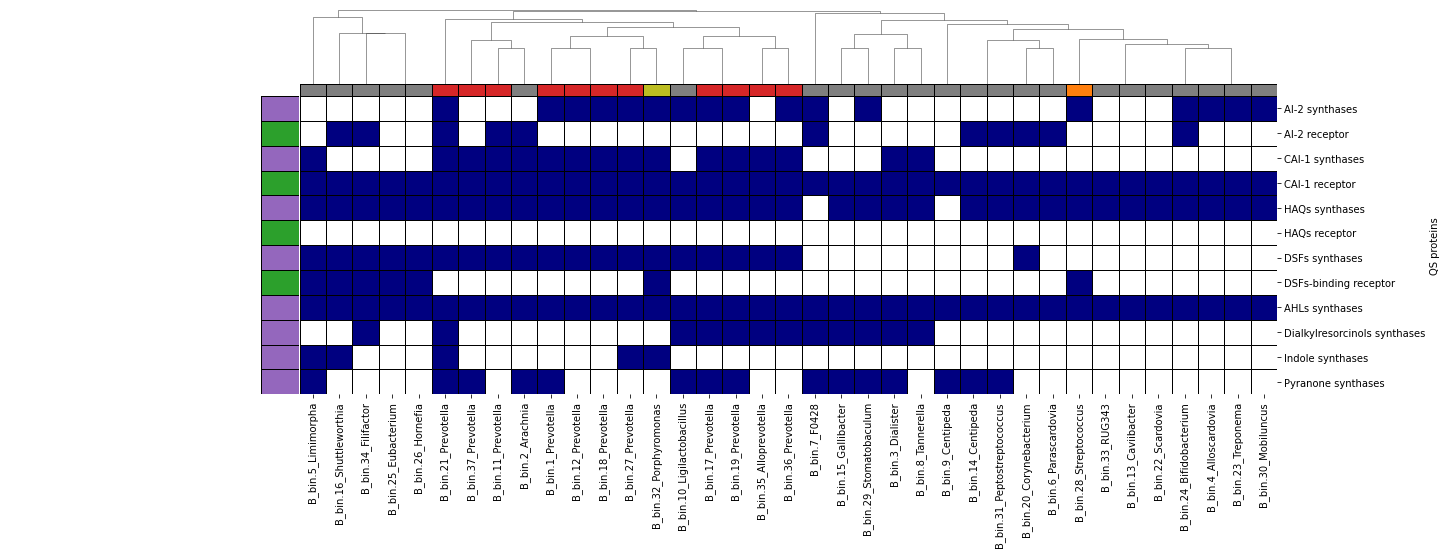

In [17]:
row_colors=[]; col_colors=[]
for qsp in B_qs.index:
    if 'recep' in qsp:
        row_colors.append('tab:green')
    else:
        row_colors.append('tab:purple')
for mag in B_qs.columns:
    if mag.split('_')[-1] not in genus_colors.keys():
        col_colors.append('tab:gray')
    else:
        col_colors.append(genus_colors[mag.split('_')[-1]])
fg=sns.clustermap(B_qs, row_cluster=False,figsize=(20,8),cmap =['white', 'navy'],cbar_kws={'ticks':[0,1.0]},
               row_colors=row_colors,col_colors=col_colors,linecolor='black',linewidths=1, cbar_pos=None)
fg.ax_heatmap.set_ylabel('QS proteins')
fg.ax_heatmap.set_xlabel('')
# fg.ax_heatmap.set_title('B Group',y=1.3,fontsize=16)
# plt.savefig('../../../../Oral_paper/Figures_2025/B_QS.svg',format='svg',dpi=150)